# Lesson 6 Basic Python for Data Analytics (Optimizing your Daily Life- Simplex, Linear Programming)
# Introduction

Intro of simplex here

**In here we are trying to:**
Optimizing our reading list (in terms of Good Reads Value)
Optimizing our traveling plan

**Business application:**
Simple Chocolate Factory Application


## Objective

* To use python pandas to read and prepare data from GoodReads csv
* Exploring the data
* Cleaning and View the data
* Optimizing simple LP Problem
    * Excel
* Optimizing the Reading List Taken using IP
    * Excel
    * Pulp


## Reading and Preparing the data

There are pleanty of websites where one can find a daily doze of reading inspiration. The dataset from this problem was scraped from Goodreads New York Times Bestseller List https://www.goodreads.com/list/show/83612.NY_Times_Fiction_Best_Sellers_2015

In [1]:
# Importing data analytics related libraries (DataFrame and Visualization)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# Magic to tell python notebook we want matplotlib charts included
%matplotlib inline

# importing pulp as an optimization solver
from pulp import *
import re 


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnaNican/optimizers/master/reading_list.csv')

## Exploring the data

In [3]:
df.describe()

,Unnamed: 0,_position,goodreads_score,rating.1,total_ratings,pages,decision
count,82.000000,82.000000,82.000000,82.000000,8.200000e+01,82.000000,82.000000
mean,40.500000,41.500000,458.182927,3.938902,6.657144e+04,411.914634,0.560976
std,23.815261,23.815261,612.672916,0.289934,2.153356e+05,132.097439,0.499322
min,0.000000,1.000000,69.000000,3.370000,1.000000e+00,179.000000,0.000000
25%,20.250000,21.250000,96.250000,3.742500,3.178500e+03,327.250000,0.000000
50%,40.500000,41.500000,196.000000,3.945000,9.191000e+03,390.000000,1.000000
75%,60.750000,61.750000,551.250000,4.107500,2.667775e+04,447.750000,1.000000
max,81.000000,82.000000,3288.000000,5.000000,1.577550e+06,1098.000000,1.000000


In [4]:
df.describe(include=['object'])

,book_name,author,rating,url,my_column/_source
count,82,82,82,82,82
unique,82,72,82,82,82
top,"Radiant Angel (John Corey, #7)",Liane Moriarty,"4.19 of 5 stars 4.19 avg rating � 5,794 ratings",https://www.goodreads.com/book/show/22571696-o...,/book/show/20767918-the-escape
freq,1,3,1,1,1


In [5]:
df.head()

,Unnamed: 0,_position,book_name,goodreads_score,author,rating,url,my_column/_source,rating.1,total_ratings,pages,decision
0,0,1,All the Light We Cannot See,3288,Anthony Doerr,"4.29 of 5 stars 4.29 avg rating � 179,342 ratings",https://www.goodreads.com/book/show/18143977-a...,/book/show/18143977-all-the-light-we-cannot-see,4.29,179342,530,0.0
1,1,2,The Fault in Our Stars,2471,John Green,"4.36 of 5 stars 4.36 avg rating � 1,577,550 ra...",https://www.goodreads.com/book/show/11870085-t...,/book/show/11870085-the-fault-in-our-stars,4.36,1577550,313,1.0
2,2,3,The Nightingale,2196,Kristin Hannah,"4.54 of 5 stars 4.54 avg rating � 52,099 ratings",https://www.goodreads.com/book/show/21853621-t...,/book/show/21853621-the-nightingale,4.54,52099,438,0.0
3,3,4,The Girl on the Train,2188,Paula Hawkins,"3.86 of 5 stars 3.86 avg rating � 282,985 ratings",https://www.goodreads.com/book/show/22557272-t...,/book/show/22557272-the-girl-on-the-train,3.86,282985,323,1.0
4,4,5,Gone Girl,1756,Gillian Flynn,"3.98 of 5 stars 3.98 avg rating � 1,083,869 ra...",https://www.goodreads.com/book/show/19288043-g...,/book/show/19288043-gone-girl,3.98,1083869,422,0.0


In [6]:
df.tail()

,Unnamed: 0,_position,book_name,goodreads_score,author,rating,url,my_column/_source,rating.1,total_ratings,pages,decision
77,77,78,Luckiest Girl Alive,76,Jessica Knoll,"3.52 of 5 stars 3.52 avg rating � 18,921 ratings",https://www.goodreads.com/book/show/22609317-l...,/book/show/22609317-luckiest-girl-alive,3.52,18921,352,1.0
78,78,79,"14th Deadly Sin (Women�s Murder Club, #14)",74,James Patterson,"3.89 of 5 stars 3.89 avg rating � 7,808 ratings",https://www.goodreads.com/book/show/23346918-1...,/book/show/23346918-14th-deadly-sin,3.89,7808,384,1.0
79,79,80,Seveneves,73,Neal Stephenson,"4.02 of 5 stars 4.02 avg rating � 10,521 ratings",https://www.goodreads.com/book/show/22816087-s...,/book/show/22816087-seveneves,4.02,10521,880,0.0
80,80,81,"Piranha (The Oregon Files, #10)",70,Clive Cussler,"4.15 of 5 stars 4.15 avg rating � 1,207 ratings",https://www.goodreads.com/book/show/23281922-p...,/book/show/23281922-piranha,4.15,1207,421,0.0
81,81,82,"The Fateful Lightning (Civil War: 1861-1865, W...",69,Jeff Shaara,4.28 of 5 stars 4.28 avg rating � 329 ratings,https://www.goodreads.com/book/show/23164911-t...,/book/show/23164911-the-fateful-lightning,4.28,329,640,0.0


## Cleaning the data

In [7]:
# Find the cleanliness of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 12 columns):
Unnamed: 0           82 non-null int64
_position            82 non-null int64
book_name            82 non-null object
goodreads_score      82 non-null int64
author               82 non-null object
rating               82 non-null object
url                  82 non-null object
my_column/_source    82 non-null object
rating.1             82 non-null float64
total_ratings        82 non-null int64
pages                82 non-null int64
decision             82 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 7.8+ KB


In [8]:
df.columns

Index([u'Unnamed: 0', u'_position', u'book_name', u'goodreads_score',
       u'author', u'rating', u'url', u'my_column/_source', u'rating.1',
       u'total_ratings', u'pages', u'decision'],
      dtype='object')

In [9]:
# Remove unnecessary columns
dfclean = df.loc[:,[u'rating.1',u'pages']]

In [10]:
dfclean.head()

,rating.1,pages
0,4.29,530
1,4.36,313
2,4.54,438
3,3.86,323
4,3.98,422


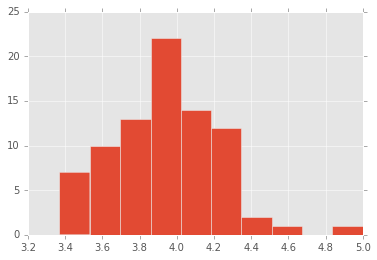

In [11]:
dfclean['rating.1'].hist()

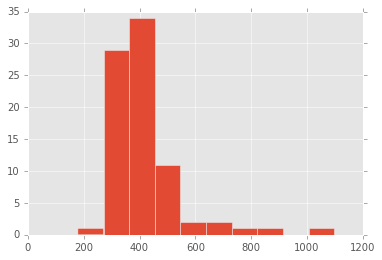

In [12]:
dfclean['pages'].hist()

##### Exporting it to excel

In [13]:
dfclean.to_excel('booklist.xlsx')

# Optimizing the Reading List Taken

## Excel

* Solver Excel add ons
* Insert Decision Variables
* Insert Objective Function: (Maximize the Number of Books we are going to read)
* Insert Constrains: (We have a Fixed Number of time to read books and Fixed Speed of Reading )
* Display final results
* Sensitivity Analysis

## Python Pulp

### Setting Up LP Problem


* Define the lp problem
* Create Decision Variables
* Define Objective Function: (Maximize the Number of Books we are going to read)
* Define Constrains: (We have a Fixed Number of time to read books and Fixed Speed of Reading )
* Display final format

In [23]:
dfclean.head()

,rating.1,pages,decision
0,4.29,530,0.0
1,4.36,313,1.0
2,4.54,438,1.0
3,3.86,323,1.0
4,3.98,422,0.0


In [14]:
# Define the lp problem
prob = pulp.LpProblem('BuyingBestsellers', pulp.LpMaximize)

In [15]:
#create decision variables
decision_variables = []
for rownum, row in dfclean.iterrows():
    variablestr = str('x' + str(rownum)) #Create naming of variables
    variable = pulp.LpVariable(str(variablestr), lowBound = 0, upBound = 1, cat= 'Integer') #make variables binary
    decision_variables.append(variable) #Appending variables

print ("Total number of decision_variables: " + str(len(decision_variables)))

Total number of decision_variables: 82


In [16]:
#create optimization function
total_books = ""
for rownum, row in dfclean.iterrows():
    for i, book in enumerate(decision_variables):
        if rownum == i:
            total_books += row['rating.1']*book
            
prob += total_books
print ("Optimization function: "+str(total_books)) 

Optimization function: 4.29*x0 + 4.36*x1 + 4.3*x10 + 4.1*x11 + 4.12*x12 + 3.8*x13 + 3.46*x14 + 3.89*x15 + 3.93*x16 + 3.76*x17 + 3.93*x18 + 3.9*x19 + 4.54*x2 + 3.95*x20 + 4.01*x21 + 3.92*x22 + 4.07*x23 + 4.01*x24 + 4.32*x25 + 4.21*x26 + 3.99*x27 + 3.8*x28 + 4.08*x29 + 3.86*x3 + 3.98*x30 + 4.21*x31 + 3.53*x32 + 3.94*x33 + 3.59*x34 + 3.58*x35 + 3.76*x36 + 4.24*x37 + 3.56*x38 + 3.99*x39 + 3.98*x4 + 3.93*x40 + 4.16*x41 + 3.69*x42 + 4.11*x43 + 4.24*x44 + 3.79*x45 + 4.09*x46 + 4.08*x47 + 4.06*x48 + 3.75*x49 + 4.1*x5 + 4.1*x50 + 3.62*x51 + 3.41*x52 + 3.7*x53 + 5.0*x54 + 3.71*x55 + 3.64*x56 + 4.0*x57 + 4.04*x58 + 3.37*x59 + 3.86*x6 + 4.34*x60 + 3.95*x61 + 4.27*x62 + 4.5*x63 + 3.95*x64 + 3.8*x65 + 3.56*x66 + 4.19*x67 + 3.66*x68 + 3.67*x69 + 3.47*x7 + 3.81*x70 + 3.89*x71 + 3.44*x72 + 3.57*x73 + 3.7*x74 + 3.83*x75 + 3.74*x76 + 3.52*x77 + 3.89*x78 + 4.02*x79 + 4.16*x8 + 4.15*x80 + 4.28*x81 + 4.22*x9


In [24]:
#create constrains - there are only 365 days
hours_week_read = 5
pages_per_hour = 60

total_pages_needs_to_read = ""
for rownum, row in dfclean.iterrows():
    for i, schedule in enumerate(decision_variables):
        if rownum == i:
            formula = row['pages']*schedule
            total_pages_needs_to_read += formula
# 50% of my book is fantasy
            
total_pages_can_read = 52*hours_week_read*pages_per_hour

prob += (total_pages_needs_to_read <= total_pages_can_read)

In [18]:
# Display problems
print prob
prob.writeLP("BuyingBestsellers.lp" )

BuyingBestsellers:
MAXIMIZE
4.29*x0 + 4.36*x1 + 4.3*x10 + 4.1*x11 + 4.12*x12 + 3.8*x13 + 3.46*x14 + 3.89*x15 + 3.93*x16 + 3.76*x17 + 3.93*x18 + 3.9*x19 + 4.54*x2 + 3.95*x20 + 4.01*x21 + 3.92*x22 + 4.07*x23 + 4.01*x24 + 4.32*x25 + 4.21*x26 + 3.99*x27 + 3.8*x28 + 4.08*x29 + 3.86*x3 + 3.98*x30 + 4.21*x31 + 3.53*x32 + 3.94*x33 + 3.59*x34 + 3.58*x35 + 3.76*x36 + 4.24*x37 + 3.56*x38 + 3.99*x39 + 3.98*x4 + 3.93*x40 + 4.16*x41 + 3.69*x42 + 4.11*x43 + 4.24*x44 + 3.79*x45 + 4.09*x46 + 4.08*x47 + 4.06*x48 + 3.75*x49 + 4.1*x5 + 4.1*x50 + 3.62*x51 + 3.41*x52 + 3.7*x53 + 5.0*x54 + 3.71*x55 + 3.64*x56 + 4.0*x57 + 4.04*x58 + 3.37*x59 + 3.86*x6 + 4.34*x60 + 3.95*x61 + 4.27*x62 + 4.5*x63 + 3.95*x64 + 3.8*x65 + 3.56*x66 + 4.19*x67 + 3.66*x68 + 3.67*x69 + 3.47*x7 + 3.81*x70 + 3.89*x71 + 3.44*x72 + 3.57*x73 + 3.7*x74 + 3.83*x75 + 3.74*x76 + 3.52*x77 + 3.89*x78 + 4.02*x79 + 4.16*x8 + 4.15*x80 + 4.28*x81 + 4.22*x9 + 0.0
SUBJECT TO
_C1: 530 x0 + 313 x1 + 369 x10 + 470 x11 + 294 x12 + 309 x13 + 358 x14
 + 396 

In [19]:
#now run optimization
optimization_result = prob.solve()
assert optimization_result == pulp.LpStatusOptimal
print("Status:", LpStatus[prob.status])
print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
for v in prob.variables():
    print(v.name, "=", v.varValue)

('Status:', 'Optimal')
('Optimal Solution to the problem: ', 180.51999999999995)
Individual decision_variables: 
('x0', '=', 0.0)
('x1', '=', 1.0)
('x10', '=', 1.0)
('x11', '=', 0.0)
('x12', '=', 1.0)
('x13', '=', 1.0)
('x14', '=', 0.0)
('x15', '=', 1.0)
('x16', '=', 1.0)
('x17', '=', 0.0)
('x18', '=', 0.0)
('x19', '=', 1.0)
('x2', '=', 1.0)
('x20', '=', 0.0)
('x21', '=', 1.0)
('x22', '=', 1.0)
('x23', '=', 0.0)
('x24', '=', 1.0)
('x25', '=', 1.0)
('x26', '=', 0.0)
('x27', '=', 0.0)
('x28', '=', 0.0)
('x29', '=', 1.0)
('x3', '=', 1.0)
('x30', '=', 1.0)
('x31', '=', 0.0)
('x32', '=', 0.0)
('x33', '=', 1.0)
('x34', '=', 0.0)
('x35', '=', 0.0)
('x36', '=', 1.0)
('x37', '=', 1.0)
('x38', '=', 1.0)
('x39', '=', 1.0)
('x4', '=', 0.0)
('x40', '=', 0.0)
('x41', '=', 1.0)
('x42', '=', 1.0)
('x43', '=', 1.0)
('x44', '=', 1.0)
('x45', '=', 1.0)
('x46', '=', 1.0)
('x47', '=', 0.0)
('x48', '=', 0.0)
('x49', '=', 0.0)
('x5', '=', 1.0)
('x50', '=', 1.0)
('x51', '=', 0.0)
('x52', '=', 1.0)
('x53', '='

### Run LP 

In [20]:
#reorder results
variable_name = []
variable_value = []

for v in prob.variables():
    variable_name.append(v.name)
    variable_value.append(v.varValue)

df = pd.DataFrame({'variable': variable_name, 'value': variable_value})
for rownum, row in df.iterrows():
    value = re.findall(r'(\d+)', row['variable'])
    df.loc[rownum, 'variable'] = int(value[0])

df = df.sort_index(by='variable')

#append results
for rownum, row in dfclean.iterrows():
    for results_rownum, results_row in df.iterrows():
        if rownum == results_row['variable']:
            dfclean.loc[rownum, 'decision'] = results_row['value']

D:\Anaconda\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


In [25]:
dfclean

,rating.1,pages,decision
0,4.29,530,0.0
1,4.36,313,1.0
2,4.54,438,1.0
3,3.86,323,1.0
4,3.98,422,0.0
5,4.10,278,1.0
6,3.86,771,0.0
7,3.47,368,0.0
8,4.16,460,0.0
9,4.22,384,1.0
